# Linear Regression

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [88]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")
#plt.style.use('ggplot')

In [89]:
# !ls gdrive/Shareddrives/Week 4/household_power_consumption.txt

ls: cannot access 'gdrive/Shareddrives/Week': No such file or directory
ls: cannot access '4/household_power_consumption.txt': No such file or directory


In [ ]:
#Loading the data
df= pd.read_csv('/content/gdrive/MyDrive/Week 4/household_power_consumption.txt', delimiter = ';')
# df= pd.read_csv('/content/gdrive/Shareddrives/Week 4/household_power_consumption.txt', delimiter = ';')

**Additional Variable Information**

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner

In [ ]:
#Display the first five rows
#quick overview of loaded data(columns' values and data format)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
#Display the last five rows
#quick overview of loaded data(columns' values and data format)
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [ ]:
#Display data type of each column
#check the type of data in order to perform the calculations required to pre-process and display the data
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [ ]:
#Conversion of data from selected columns into numeric form
df['Global_active_power']=pd.to_numeric(df['Global_active_power'],errors='coerce')
df['Global_reactive_power']=pd.to_numeric(df['Global_reactive_power'],errors='coerce')
df['Voltage']=pd.to_numeric(df['Voltage'],errors='coerce')
df['Global_intensity']=pd.to_numeric(df['Global_intensity'],errors='coerce')
df['Sub_metering_1']=pd.to_numeric(df['Sub_metering_1'],errors='coerce')
df['Sub_metering_2']=pd.to_numeric(df['Sub_metering_2'],errors='coerce')
df['Sub_metering_3']=pd.to_numeric(df['Sub_metering_3'],errors='coerce')

In [ ]:
#Check if the data are really convected
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
# Count missing values in each column
missing_data = df.isna().sum()
print("Missing data in each column:")
print(missing_data)

Missing data in each column:
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [ ]:
# List of columns to replace missing values with mean
columns_to_fill = ['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3']
# Replace missing values in specific columns with the mean of each column
for col in columns_to_fill:
    col_mean = df[col].mean()
    df[col].fillna(col_mean, inplace=True)

In [ ]:
# Check if missing values in each column have been replaced
missing_data = df.isna().sum()
print("Missing data in each column:")
print(missing_data)

Missing data in each column:
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


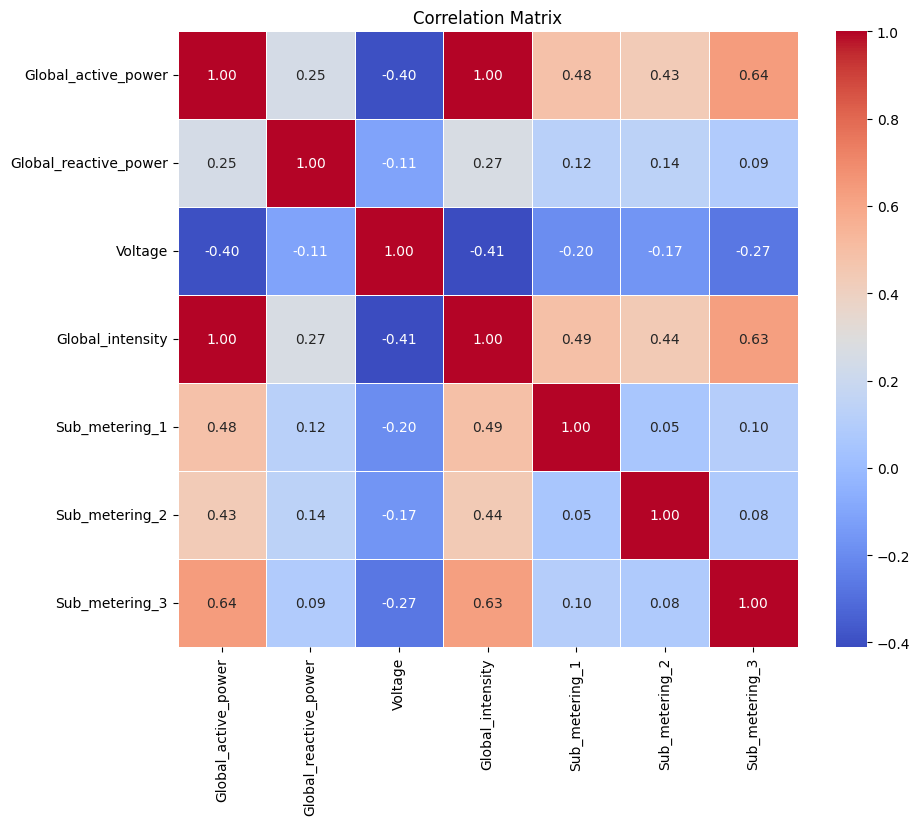

In [ ]:
selected_features = df[['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3']]
# Correlation matrix
correlation_matrix = selected_features.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

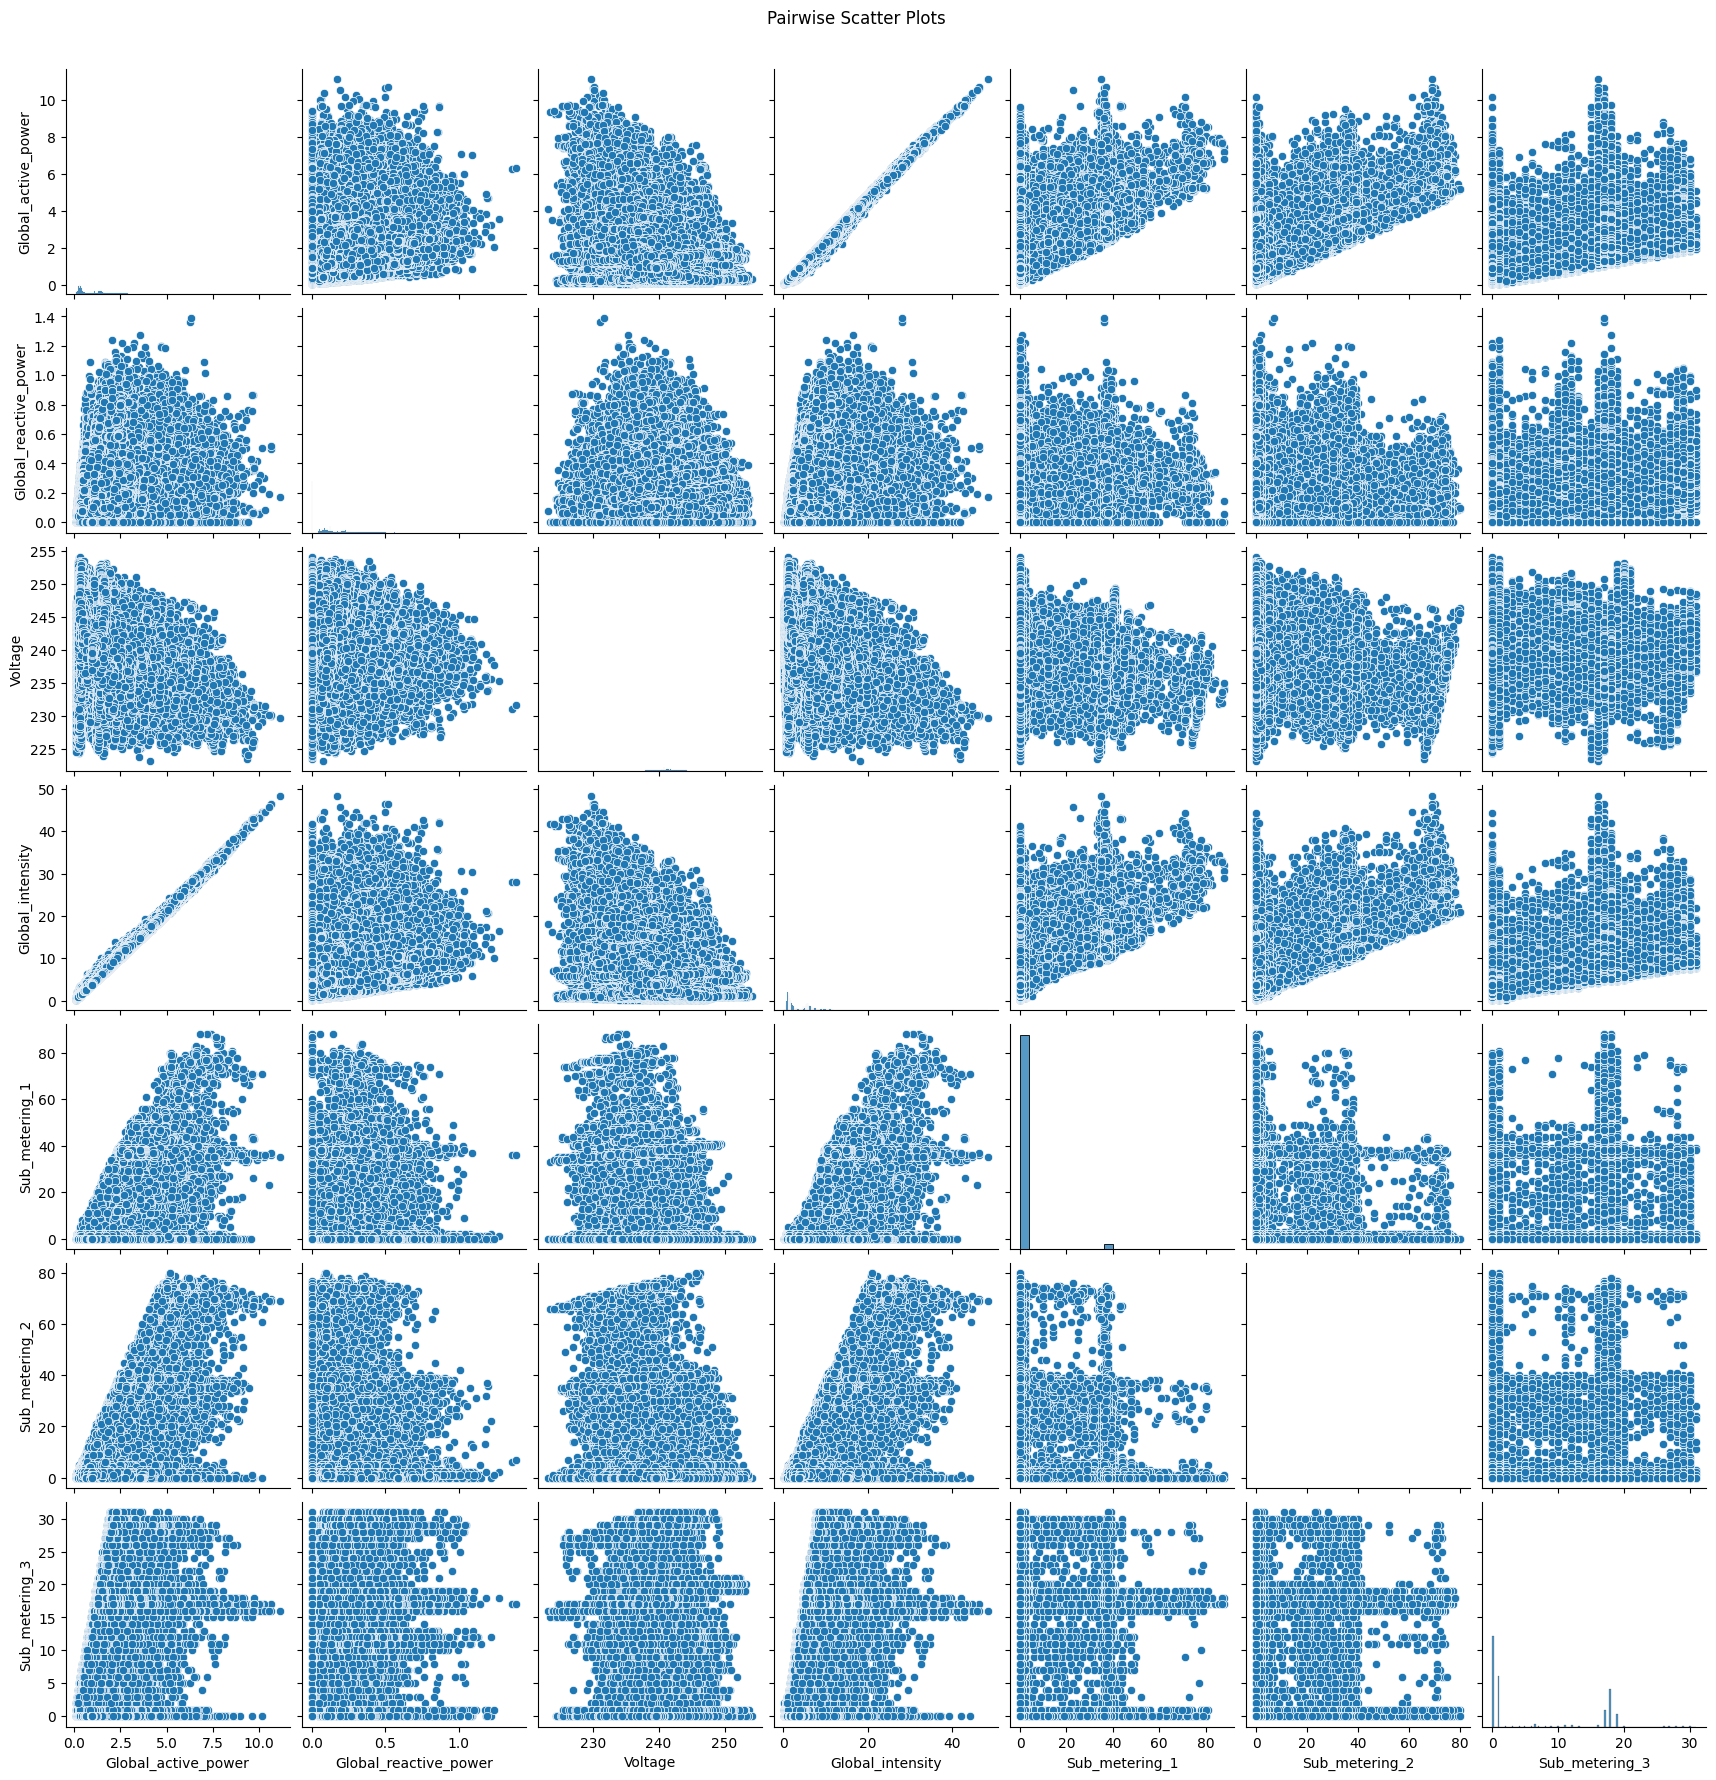

In [ ]:
# Pairwise scatter plots
dfs=df.sample(n=1000)#sample 1000 random rows from the DataFramesns.pairplot(selected_features)
sns.pairplot(selected_features)
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Features selection and type of regression

## According to the correlation matrix we can select as the global intesity$(R^2=1)$ and the sub metering 3 $(R^2=0.64)$ because they are the most correlated to the global active power. Nevertheless the global intensity and the sub metering are correlated. In addition according to the pair plot only the scatter plot of the global active power against the global intensity shows a linear relationship. Therefore the linear regression is the model the most suitable using only the glogal intensity as the feature and the global active power as the target.

In [ ]:
from sklearn.preprocessing import StandardScaler
Feature=df['Global_intensity']
Target=df['Global_active_power']
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size=0.2, random_state=42)
# Linear Regression model
model = LinearRegression()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(pd.DataFrame(X_train))
X_test_scaled = scaler.transform(pd.DataFrame(X_test))

# Model fitting and prediction
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.9977676284577912
Mean Squared Error: 0.0024653963461206923


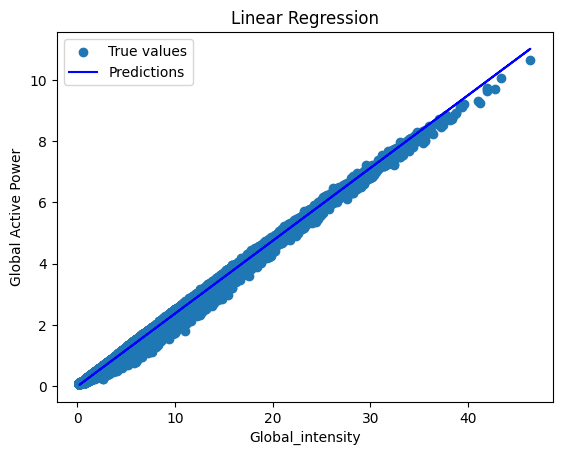

In [ ]:
# Plotting

plt.scatter(X_test, y_test,label='True values')
plt.plot(X_test,predictions, 'b',label='Predictions')
plt.xlabel('Global_intensity')
plt.ylabel('Global Active Power')
plt.title('Linear Regression')
plt.legend()
plt.show()

# LOGISTIC REGRESSION

In [ ]:
#import libraries and packages

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [90]:
# Reading dataset
data = pd.read_csv('/content/gdrive/MyDrive/Week 4/logistic_regression_dataset-Social_Network_Ads.csv')
# data = pd.read_csv('/content/gdrive/Shareddrives/Week 4/logistic_regression_dataset-Social_Network_Ads.txt', delimiter = ';')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# create a copy of the data set to work with
ads = data.copy()

In [ ]:
ads.shape

(400, 5)

In [ ]:
ads['Purchased'].unique()

array([0, 1])

In [ ]:
# Encoding data using dictionary
my_dict = {'Male': 0, 'Female': 1}
ads['Gender_encoded'] = ads['Gender'].map(my_dict)

In [ ]:
ads

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,1
3,15603246,Female,27,57000,0,1
4,15804002,Male,19,76000,0,0
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1
396,15706071,Male,51,23000,1,0
397,15654296,Female,50,20000,1,1
398,15755018,Male,36,33000,0,0


In [ ]:
# Take relevant columns (removed User ID and Gender)
cols = ['Age', 'EstimatedSalary', 'Purchased','Gender_encoded']

In [ ]:
# Normalisation of Ages and EstimatedSalary
ads[['Age', 'EstimatedSalary']] = StandardScaler().fit_transform(ads[['Age', 'EstimatedSalary']])

In [ ]:
# Take relevant columns (removed User ID and Gender)
cols = ['Age', 'EstimatedSalary', 'Purchased','Gender_encoded']

In [ ]:
# Normalisation of Ages and EstimatedSalary
ads[['Age', 'EstimatedSalary']] = StandardScaler().fit_transform(ads[['Age', 'EstimatedSalary']])

In [ ]:
ads

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,Male,-1.781797,-1.490046,0,0
1,15810944,Male,-0.253587,-1.460681,0,0
2,15668575,Female,-1.113206,-0.785290,0,1
3,15603246,Female,-1.017692,-0.374182,0,1
4,15804002,Male,-1.781797,0.183751,0,0
...,...,...,...,...,...,...
395,15691863,Female,0.797057,-0.844019,1,1
396,15706071,Male,1.274623,-1.372587,1,0
397,15654296,Female,1.179110,-1.460681,1,1
398,15755018,Male,-0.158074,-1.078938,0,0


In [ ]:
ads[cols]

,Age,EstimatedSalary,Purchased,Gender_encoded
0,-1.781797,-1.490046,0,0
1,-0.253587,-1.460681,0,0
2,-1.113206,-0.785290,0,1
3,-1.017692,-0.374182,0,1
4,-1.781797,0.183751,0,0
...,...,...,...,...
395,0.797057,-0.844019,1,1
396,1.274623,-1.372587,1,0
397,1.179110,-1.460681,1,1
398,-0.158074,-1.078938,0,0


In [ ]:
# Select features and target columns
target = ads['Purchased']
features = ads[['Age', 'EstimatedSalary', 'Gender_encoded']]

features

,Age,EstimatedSalary,Gender_encoded
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,1
3,-1.017692,-0.374182,1
4,-1.781797,0.183751,0
...,...,...,...
395,0.797057,-0.844019,1
396,1.274623,-1.372587,0
397,1.179110,-1.460681,1
398,-0.158074,-1.078938,0


In [ ]:
# Split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=111)

In [ ]:
print(f"X train {X_train.shape}\ny_train {y_train.shape}")

X train (320, 3)
y_train (320,)


In [ ]:
print(f"X tesxt {X_test.shape}\ny_test {y_test.shape}")

X tesxt (80, 3)
y_test (80,)


In [ ]:
# Initialization of Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
weight_df = pd.DataFrame(
    {'features': ['Age', 'EstimatedSalary', 'Gender_encoded'],
    'weights': model.coef_.tolist()[0]
    }
)
weight_df

,features,weights
0,Age,2.004722
1,EstimatedSalary,1.056670
2,Gender_encoded,-0.144584


In [ ]:
pred_train = model.predict(X_train)

In [ ]:
# Accuracy on training set
acc_train = accuracy_score(y_train, pred_train)
print(f"Accuracy of training set {acc_train}")

Accuracy of training set 0.834375


In [ ]:
model.predict_proba(X_train)

array([[0.89778099, 0.10221901],
       [0.98306195, 0.01693805],
       [0.635935  , 0.364065  ],
       [0.7022925 , 0.2977075 ],
       [0.55016234, 0.44983766],
       [0.45491375, 0.54508625],
       [0.58818602, 0.41181398],
       [0.91606594, 0.08393406],
       [0.86682479, 0.13317521],
       [0.95911212, 0.04088788],
       [0.98163242, 0.01836758],
       [0.95729594, 0.04270406],
       [0.51154339, 0.48845661],
       [0.99297402, 0.00702598],
       [0.70245802, 0.29754198],
       [0.98255026, 0.01744974],
       [0.90912681, 0.09087319],
       [0.91848044, 0.08151956],
       [0.02488545, 0.97511455],
       [0.96037034, 0.03962966],
       [0.7055988 , 0.2944012 ],
       [0.73984413, 0.26015587],
       [0.87214569, 0.12785431],
       [0.14817501, 0.85182499],
       [0.98822221, 0.01177779],
       [0.72578295, 0.27421705],
       [0.65719191, 0.34280809],
       [0.31393523, 0.68606477],
       [0.707643  , 0.292357  ],
       [0.64570014, 0.35429986],
       [0.

In [ ]:
print("Acutal values of training set:", pred_train[:20])
print("Predicted val. of training set", np.transpose(np.array(y_train[:20])))

Acutal values of training set: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Predicted val. of training set [0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0]


In [ ]:
model.classes_

array([0, 1])

In [ ]:
pred_test = model.predict(X_test)

In [ ]:
print("Acutal values of testing set:", pred_test[:20])
print("Predicted val. of testing set", np.transpose(np.array(y_test[:20])))

Acutal values of testing set: [0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]
Predicted val. of testing set [0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0]


In [ ]:
acc_test = accuracy_score(y_test, pred_test)
print(f"Accuracy of training set {acc_test}")

Accuracy of training set 0.8625


In [ ]:
# Showing confusion matrix
mat = confusion_matrix(y_test, pred_test)

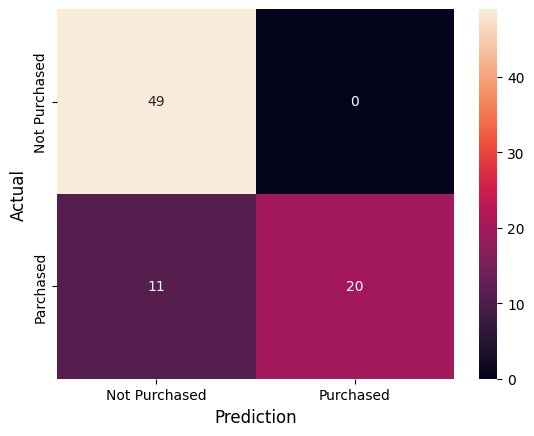

In [ ]:
# define and print matrix with labels
sns.heatmap(mat,
            annot=True,
            fmt='g',
            xticklabels=['Not Purchased','Purchased'],
            yticklabels=['Not Purchased','Parchased'])

# display matrix
plt.ylabel('Actual',fontsize=12)
plt.xlabel('Prediction',fontsize=12)
plt.show()

In [ ]:
levels = pd.factorize(ads['Gender'])
print(classification_report(y_test,pred_test, target_names=["Male", "Female"]))

              precision    recall  f1-score   support

        Male       0.82      1.00      0.90        49
      Female       1.00      0.65      0.78        31

    accuracy                           0.86        80
   macro avg       0.91      0.82      0.84        80
weighted avg       0.89      0.86      0.85        80

